In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy.pyasl import foldAt

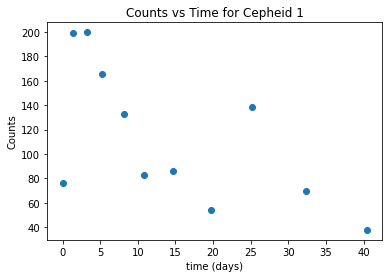

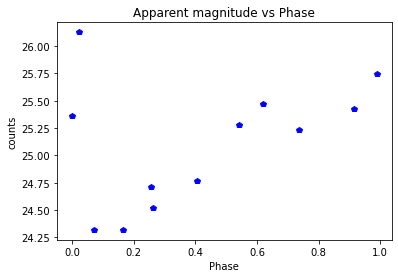

The absolute magnitude is -4.781502889463474
The distance in parsecs is 9801323.342326352
The distance in MPc is 9.801323342326352


In [26]:
data = np.loadtxt('Cepheid_Variables.txt',skiprows=1)

sum_lil,npix_lil,sum_big,npix_big,time = data[:,0],data[:,1],data[:,2],data[:,3],data[:,4] # Data

# Sets a 0 points for the time
time = time - time[0]

# This finds the sum per pixel of the background of the torus surrounding the cepheid variable, finds out how much
# background is in the cepheid region then subtracts that background from the cepheid star flux
star = sum_lil - (sum_big - sum_lil)/(npix_big-npix_lil)*npix_lil # Background flux subtracted from the star flux

new_star = star[0:-1] # removing the final term because it has too big a time gap (Not required when phase folding)

# Counts vs time
plt.scatter(time[0:-1],new_star)
plt.ylabel('Counts')
plt.xlabel('time (days)')
plt.title('Counts vs Time for Cepheid 1')
plt.show()

# m1 - 22.57 = -2.5log10(F/1000), where m1 and F are the cepheid variable apparent magnitude and flux (counts)
# In the lab script you're given the HST reference of 1000 counts is 22.57 apparent magnitude
m2 = 22.57
m1 = m2 - 2.5*np.log10(star/1000) 


# Obtain the phases with respect to some
# reference point (in this case T0=0) with a guess phase of 20.0
phases = foldAt(time, 20, T0=0)

# Sort with respect to phase
# First, get the order of indices ...
sortIndi = np.argsort(phases)
# rearrange the arrays.
phases = phases[sortIndi]
magnitude = m1[sortIndi]

# Plot the result
plt.plot(phases, magnitude, 'bp')
plt.xlabel('Phase')
plt.ylabel('counts')
plt.title('Apparent magnitude vs Phase')
plt.show()

P = 20 # approx period in days

M = -4.05 - 2.43*(np.log10(P)-1)
print("The absolute magnitude is " + str(M))

# m - M = 5log(d/10)
d = 10*10**((m1-M)/5) # Rearranged for d (in pc)
d = np.mean(d) # Mean


print("The distance in parsecs is " + str(d)) # In pc
print("The distance in MPc is " + str(d/1e6)) # In MPc


In [22]:
# Pipeline

# Plot counts vs time (with background removed)
# Find the period of the cepheid
# Hubble Space Telescope Fine Guidance Sensor Parallaxes of Galactic Cepheid Variable Stars:  Period-Luminosity Relations
# Use above paper for PLR
# Use M =a+b*(logP-1) where a and b values correspond to filter "V", a=-4.05±0.02, b=-2.43±0.12
# m - M = 5log(d/10)
# d=10*10^(m-M/5)
